In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

In [3]:
from tensorflow import keras

In [4]:
keras.__version__

'2.8.0'

## Using keras to load the Dataset
- Keras provide some utility functions to fetch and load common datasets, including MNIST, Fashion MNIST, the original California housing dataset

### Lets load Fashion MNIST

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Information about the data
- When loading MNIST or Fashion MNIST using Keras rather than Scikit learn, every image is represented as 28*28 array rather than a 1D array of size 784.
- pixels are represented as integers from 0 to 255 rather than floats

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

## Scaling the train data and creating valid dataset
- We have already splitted data in train and test set now its time to split in valid dataset
- We are also performing scaling on train and valid dataset to scale it from 0 to 1 by dividing it by 255.0 and also converting them to float

In [9]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### List of class names

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

# Creating the model using the Sequential API

## Classification MLP with two hidden layers

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Metal device set to: Apple M1


2022-04-01 15:27:46.445717: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-01 15:27:46.445789: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Let go through this code line by line
- The first line creates a Sequential model. This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API
- Next, we build the first layer and add it to the model. It is a `Flatten` layer whose role is simply to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1). This layer does not have any parameters, it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the input_shape: this does not include the batch size, only the shape of the instances. Alternatively, you could add a `keras.layers.InputLayer` as the first layer, setting `shape=[28,28]`.
- Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activa‐ tion function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).
- Next we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.
- Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

### Another way to do the above code
`model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
])`

## Summary of the model layers

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- Note that Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

## A list of model layers and accessing it

In [14]:
model.layers

In [15]:
model.layers[1].name

'dense'

In [16]:
model.get_layer('dense').name

'dense'

## Getting the weights and biases for a layer

In [17]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [18]:
weights

array([[ 0.00585803,  0.06344549,  0.04122774, ..., -0.05374366,
        -0.01570103,  0.00206   ],
       [ 0.06813245,  0.07389125, -0.02793618, ...,  0.07149798,
        -0.06081992,  0.01793503],
       [ 0.04543528, -0.02525124,  0.01265869, ..., -0.0643852 ,
         0.02267198,  0.0205352 ],
       ...,
       [ 0.06121957,  0.01455253,  0.05839023, ..., -0.03170189,
        -0.03819613,  0.03052379],
       [ 0.02232098,  0.03583453,  0.0131295 , ..., -0.00052706,
         0.07325165, -0.05244085],
       [ 0.05371958,  0.00914665, -0.04542506, ...,  0.01266382,
        -0.03666344,  0.03274027]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

# Compiling the model

In [22]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

- First, we use the `"sparse_categorical_crossentropy"` loss because we have `sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case)`, and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the `"categorical_crossentropy"` loss instead. 
- If we were doing `binary classification` (with one or more binary labels), then we would use the `"sigmoid"`(i.e., logistic) activation function in the output layer instead of the `"softmax"` activation function, and we would use the `"binary_crossentropy"` loss

## Training and Evaluating the model

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
   1/1719 [..............................] - ETA: 5:18 - loss: 2.3705 - accuracy: 0.0625

2022-04-01 15:27:46.701553: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-01 15:27:46.820225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7112 - accuracy: 0.7663

2022-04-01 15:27:55.188275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 9s 5ms/step - loss: 0.7112 - accuracy: 0.7663 - val_loss: 0.4992 - val_accuracy: 0.8336
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4866 - accuracy: 0.8310 - val_loss: 0.4522 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4450 - accuracy: 0.8444 - val_loss: 0.4184 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4180 - accuracy: 0.8539 - val_loss: 0.4035 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3986 - accuracy: 0.8609 - val_loss: 0.3872 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3823 - accuracy: 0.8657 - val_loss: 0.3714 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3683 - accuracy: 0.8700 - val_loss: 0.3574 - val_accuracy: 0.8718
Epo

- The fit() method returns a History object containing the training `parameters (history.params)`, `the list of epochs it went through (history.epoch)`, and most importantly `a dictionary (history.history)` containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set 

## Plotting the history

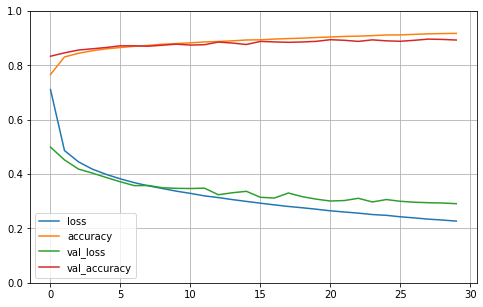

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # limits y axis range to [0-1]
plt.show()

# Evaluating it on the test set
- Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the evaluate() method.

In [30]:
model.evaluate(X_test, y_test)

 41/313 [==>...........................] - ETA: 1s - loss: 49.7685 - accuracy: 0.8628

2022-04-01 15:36:26.659830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 56.6820 - accuracy: 0.8548


[56.682044982910156, 0.8548000454902649]

# Making predictions

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

2022-04-01 15:39:35.429865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

- this tells you which class has how much probability.
- If you want to directly know the class of max probability we can use `np.argmax` function

In [34]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

array([9, 2, 1])

In [35]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_new = y_test[:3]

In [37]:
y_new

array([9, 2, 1], dtype=uint8)

- This means that y_pred and y_test is accurate  i.e our model predicted the object correctly.